In this colab, we will demonstrate working of `MLPClassifier` to classify handwritten digits in `MNIST` dataset.

## **Imports**

* We will begin by importing basic python libraries like `numpy` and `pandas`.
* `matplotlib.pyplot` and `seaborn` for plotting.
* The `mnist` dataset is downloaded using `fetch_openml` library.
* The `MLPClassifier` is imported from `sklearn.neural_network` module.
* The model training and evaluation is performed with cross validation using a bunch of model selection utilities like `cross_val_score`, `train_test_split`, `StratifiedShuffleSplit` etc.
* The performance on the test samples is obtained via `accuracy_score`, `confusion_matrix` and `classification_report`.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, \
ConfusionMatrixDisplay, classification_report

from sklearn.model_selection import cross_val_score, train_test_split, \
  GridSearchCV, StratifiedShuffleSplit

In [4]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

## **Load dataset**

Let us use the MNIST Dataset for the demo of MLPClassifier

In [5]:
# Load dataset
X,y= fetch_openml('mnist_784',version=1,return_X_y=True) 
X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
# Flatten each input image into a vector of length 784 
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

# Normalizing. 
X_train = X_train/255
X_test = X_test/255

In [7]:
print('Shape of training data after flattening',X_train.shape)
print('Shape of testing data after flattening', X_test.shape)

Shape of training data after flattening (60000, 784)
Shape of testing data after flattening (10000, 784)


In [ ]:
print('Shape of training data',X_train.shape)
print('Shape of training labels', y_train.shape)
print('Shape of testing data', X_test.shape)
print('Shape of testing labels',y_test.shape)

Shape of training data (60000, 784)
Shape of training labels (60000,)
Shape of testing data (10000, 784)
Shape of testing labels (10000,)


## **Fit MLPClassifer on MNIST dataset**

Let us train a MLP classifier with one hidden layer having 128 neurons.

In [8]:
mlpc = MLPClassifier(hidden_layer_sizes=(128,))
mlpc.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128,))

In [9]:
cv_score = cross_val_score(mlpc, X_train, y_train.ravel(),cv=cv)
print("Training Accuracy: {:.2f} %".format(cv_score.mean()*100))

Training Accuracy: 97.65 %


In [10]:
# prediction probabilities of test data
mlpc.predict_proba(X_test[:5])

array([[1.41482765e-12, 2.69713227e-15, 2.71689440e-10, 1.70819872e-06,
        4.58678966e-19, 6.74766808e-13, 9.26475230e-23, 9.99998291e-01,
        9.31561461e-10, 8.73404293e-13],
       [1.15420887e-15, 1.77196362e-11, 1.00000000e+00, 5.71303647e-11,
        5.76369588e-33, 1.43663483e-12, 5.39017848e-15, 2.02432915e-26,
        8.38939556e-13, 2.12001897e-27],
       [3.35216224e-12, 9.99996699e-01, 4.78557098e-07, 4.10557311e-11,
        6.26452704e-09, 3.65755301e-09, 2.97084824e-09, 6.43327911e-07,
        2.16646956e-06, 4.83858943e-11],
       [1.00000000e+00, 2.13790149e-16, 3.28611258e-11, 1.99645299e-14,
        2.41688532e-21, 3.46367821e-14, 8.25416658e-13, 3.08495329e-16,
        2.04599947e-20, 2.27176207e-13],
       [3.82494180e-10, 1.68480680e-15, 3.63928013e-12, 3.22959329e-14,
        9.99683993e-01, 7.51661226e-15, 3.29635308e-12, 3.83473072e-10,
        2.96978107e-11, 3.16006332e-04]])

In [12]:
# prediction class labels of test data
y_pred = mlpc.predict(X_test)

In [13]:
print("Train accuracy: {:.2f}%".format(
    accuracy_score(y_train, mlpc.predict(X_train))*100))
print("Test accuracy: {:.2f}%".format(
    accuracy_score(y_test, y_pred)*100))

Train accuracy: 100.00%
Test accuracy: 97.99%


## **Confusion matrix plot**

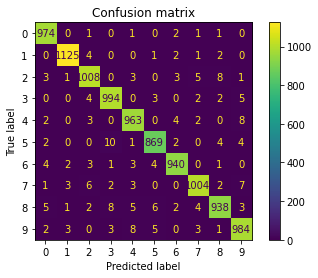

In [14]:
# visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion matrix')
plt.show()

In [15]:
CR = classification_report(y_test, y_pred)
print('Classification report \n')
print(CR)

Classification report 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Plot of test data along with predicted class labels

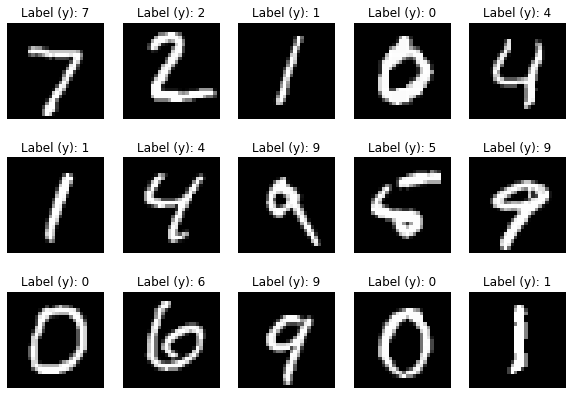

In [16]:
# Plotting some test samples and 
fig = plt.figure(figsize=(10,7))
for i in range(15):  
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(X_test[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    ax.set_title('Label (y): {y}'.format(y=y_pred[i]))
    plt.axis('off')

## **Visualization of multi layer perceptron weights in hidden layer**

- Looking at the learned coefficients of a neural network can provide insight into the learning behavior. 
- The input data consists 784 features in the dataset. 
- We have used one hidden layer with 128 neurons. Therefore weight matrix has the shape (784, 128). 
- We can therefore visualize a single column of the weight matrix as a 28 x 28 pixel image.

In [17]:
w = mlpc.coefs_
w = np.array(w[0])
w.shape

(784, 128)

In [18]:
w1 = np.array(w[:,0])
w1.shape

(784,)

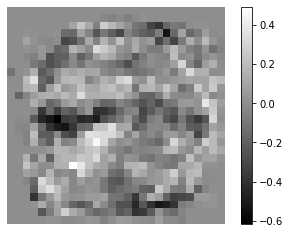

In [19]:
w_matrix = w1.reshape(28,28)
fig = plt.figure()
plt.imshow(w_matrix,cmap='gray')
plt.grid(False)
plt.axis(False)
plt.colorbar()
plt.show()

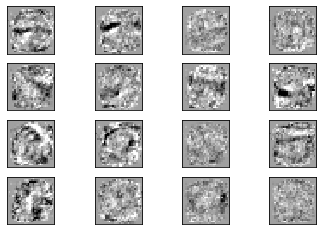

In [20]:
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlpc.coefs_[0].min(), mlpc.coefs_[0].max()
for coef, ax in zip(mlpc.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray,
               vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

Text(0.5, 1.0, 'Loss curve')

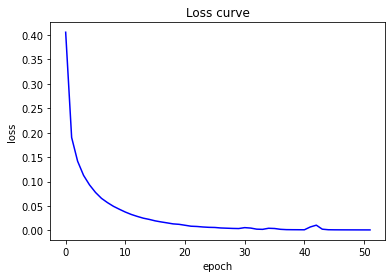

In [21]:
plt.plot(mlpc.loss_curve_, 'b-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss curve')

## **Using GridsearchCV**

Let us use a grid search cross-validation to explore combinations of parameters of MLPClassifier. 
1. Activation functions
2. Learning rate strategies
3. Alpha

In [22]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)

# learning_strategy=['constant','invscaling']
# activation_func=['identity', 'logistic', 'tanh', 'relu']
# alphas = np.logspace(-1, 1, 5)


# param_grid = dict(activation = activation_func, learning_rate=learning_strategy, alpha=alphas)
# cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
# grid = GridSearchCV(MLPClassifier(learning_rate_init=0.1, max_iter=100,solver='adam'), param_grid=param_grid, cv=cv)
# grid.fit(X_train, y_train)
# 

In [23]:
# print("The best parameters are : ", grid.best_params_)
# print("The best score is : ", grid.best_score_*100)